# Similitud de documentos (I)

## Cargar dataset generado

In [1]:
import json
import zlib

import numpy as np
import seaborn as sns

%matplotlib inline

import config

# Import
with open(config.DATASET_MUCHOCINE, 'r') as fd:
    documents = json.loads(zlib.decompress(fd.read()))

## Modelo vectorial

In [2]:
from collections import Counter

from sklearn.feature_extraction import DictVectorizer

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html

In [3]:
model_vect = DictVectorizer()
docs_vect = model_vect.fit_transform([Counter(doc['body_tokens']) for doc in documents])

In [4]:
print "Documentos:{}\nPalabras:{}".format(*docs_vect.get_shape())

Documentos:3878
Palabras:48472


In [5]:
model_vect.get_feature_names()

[u'0',
 u'00',
 u'000',
 u'0015',
 u'007',
 u'007lo',
 u'007por',
 u'02',
 u'05',
 u'06',
 u'07sevill',
 u'0px',
 u'1',
 u'10',
 u'100',
 u'1000',
 u'10000',
 u'100000',
 u'1001',
 u'1003',
 u'100de',
 u'100el',
 u'100en',
 u'100jack',
 u'100real',
 u'101',
 u'1010657',
 u'1012',
 u'1013',
 u'102',
 u'103',
 u'1030',
 u'10484',
 u'105',
 u'107',
 u'1073',
 u'108',
 u'1080',
 u'109',
 u'10le',
 u'10los',
 u'10pd',
 u'10px',
 u'10sol',
 u'10un',
 u'11',
 u'110',
 u'1100',
 u'11000',
 u'1109',
 u'111',
 u'114',
 u'114000',
 u'115',
 u'116',
 u'117',
 u'117lo',
 u'119',
 u'119lo',
 u'11m',
 u'11mla',
 u'11s',
 u'11ses',
 u'11sjepor',
 u'11un',
 u'12',
 u'120',
 u'120lo',
 u'121',
 u'123',
 u'1237461',
 u'125',
 u'126',
 u'12642',
 u'127',
 u'128',
 u'1294874',
 u'13',
 u'130',
 u'131',
 u'1314',
 u'132',
 u'1331',
 u'135',
 u'136906',
 u'137',
 u'138243',
 u'139',
 u'13pu',
 u'13rdqu',
 u'13vay',
 u'14',
 u'140',
 u'1400',
 u'14000',
 u'14041986',
 u'1408',
 u'141',
 u'1430',
 u'144',
 u'1

In [6]:
assert(len(documents[0]['body_tokens'])==docs_vect[0].sum())

In [7]:
print docs_vect[0].sum()

272.0


In [8]:
print docs_vect[0].toarray()  # Sparse representation

[[ 0.  0.  0. ...,  0.  0.  0.]]


## Similitud entre documentos

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
def find_most_similars(doc_id, docs_vect, n=1):
    '''Return the most (n) similar documents from the list
    '''
    rank = sorted(enumerate(cosine_similarity(docs_vect[doc_id], docs_vect)[0]), reverse=True, key= lambda (_,similarity): similarity)
    rank = [x for x in rank if x[0]!=doc_id] # Filter original doc
    return rank[:n]

In [11]:
find_most_similars(0, docs_vect, 4)

[(3011, 0.33311374166161162),
 (2170, 0.32230902580226484),
 (560, 0.32168275120635026),
 (234, 0.31674820650634389)]

In [12]:
all_sims = cosine_similarity(docs_vect, docs_vect)  # NxN document similarity matrix
np.fill_diagonal(all_sims,0)  # The most similar document is itself, set to 0
most_similar = all_sims.argmax(axis=1)
similarities = []  # (doc,doc, similarity) for most similar document to each one
for n_doc in xrange(len(documents)):
    sim_doc = most_similar[n_doc]
    similarities.append( (n_doc, sim_doc, all_sims[n_doc, sim_doc]) )
similarities.sort(key=lambda x:x[2], reverse=True)

In [13]:
similarities[:20]

[(1405, 1430, 1.0000000000000024),
 (1430, 1405, 1.0000000000000024),
 (3015, 3016, 1.0000000000000013),
 (3016, 3015, 1.0000000000000013),
 (1479, 1493, 0.99999999999999833),
 (1493, 1479, 0.99999999999999833),
 (1284, 1286, 0.999999999999998),
 (1286, 1284, 0.999999999999998),
 (1661, 3580, 0.99671727146705169),
 (3580, 1661, 0.99671727146705169),
 (1180, 1243, 0.99663864595149498),
 (1243, 1180, 0.99663864595149498),
 (3008, 3018, 0.97706422018348571),
 (3018, 3008, 0.97706422018348571),
 (2685, 2774, 0.97348944743158494),
 (2774, 2685, 0.97348944743158494),
 (852, 1477, 0.93293376663619221),
 (1477, 852, 0.93293376663619221),
 (1955, 2005, 0.90712052044799296),
 (2005, 1955, 0.90712052044799296)]

Parece que hay documentos muy parecidos.

In [14]:
# Quitar duplicados, mismo texto y autor

similarities = [
    (doc1,doc2,sim)
    for doc1,doc2,sim in similarities
    if not (
        documents[doc1]['body'] == documents[doc2]['body'] and
        documents[doc1]['author'] == documents[doc2]['author']
    )
]

similarities[:20]

[(1479, 1493, 0.99999999999999833),
 (1493, 1479, 0.99999999999999833),
 (1284, 1286, 0.999999999999998),
 (1286, 1284, 0.999999999999998),
 (1661, 3580, 0.99671727146705169),
 (3580, 1661, 0.99671727146705169),
 (1180, 1243, 0.99663864595149498),
 (1243, 1180, 0.99663864595149498),
 (3008, 3018, 0.97706422018348571),
 (3018, 3008, 0.97706422018348571),
 (2685, 2774, 0.97348944743158494),
 (2774, 2685, 0.97348944743158494),
 (852, 1477, 0.93293376663619221),
 (1477, 852, 0.93293376663619221),
 (1955, 2005, 0.90712052044799296),
 (2005, 1955, 0.90712052044799296),
 (2931, 3153, 0.63421150849425934),
 (3153, 2931, 0.63421150849425934),
 (1038, 1101, 0.62157726868410945),
 (1101, 1038, 0.62157726868410945)]

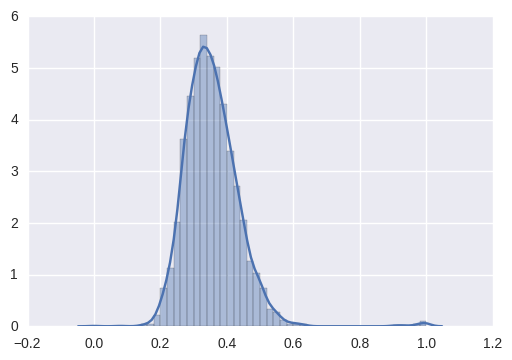

In [15]:
sns.distplot([x[2] for x in similarities])

### Encontrar copiones de comentarios

In [16]:
def find_copycats(similarities, threshold):
    """Documentos muy parecidos con diferentes autores"""
    retval = []
    for doc1,doc2,score in similarities:
        if score>threshold and documents[doc1]['author']!=documents[doc2]['author']:
            retval.append((doc1,doc2,score))
    return retval

In [17]:
find_copycats(similarities,0.65)

[(1479, 1493, 0.99999999999999833),
 (1493, 1479, 0.99999999999999833),
 (1284, 1286, 0.999999999999998),
 (1286, 1284, 0.999999999999998)]

In [18]:
for doc1,doc2,score in find_copycats(similarities,0.65):
    print u"Authors: {}-{}, {}".format(documents[doc1]['author'], documents[doc2]['author'], score)

Authors: Albert Puyuelo-Francisco Bellón, 1.0
Authors: Francisco Bellón-Albert Puyuelo, 1.0
Authors: Francisco Bellón-Albert Puyuelo, 1.0
Authors: Albert Puyuelo-Francisco Bellón, 1.0


### Los dos documentos más parecidos

In [19]:
def print_doc(doc):
    print doc['author']
    print doc['title']
    print doc['body']

doc1, doc2, score = [s for s in similarities if s[2]<0.65][0]
print "Score: {}\n".format(score)
print_doc(documents[doc1])
print ""
print_doc(documents[doc2])

Score: 0.634211508494

Rafa Ferrer
Alien vs Predator
Si soy sincero el proyecto no me llamaba lo más mínimo, y tampoco tenía una curiosidad excesiva por la película, si bien es verdad que este verano me he dedicado a echarle un ojo a la saga Alien y que las películas de Depredador hace bastante tiempo que las vi, vaya si exagerar por lo menos como 10 ańitos. Sin lugar a dudas, hacer un "Crossover" (mezcla de dos sagas) con dos personajes tan emblemáticos del cine de sci-fi de la FOX me parecía una soberana memez y más una vez que vi aquella idiotez llamada "Freddy Vs Jason" que tuve que aguantar entre una mezcla de sopor y ganas de matar a más de uno. Pues bien, aqui casi se repite la misma fórmula, aderezada con cine de entretenimiento o de acción, lo podeis llamar de las dos formas y es casi casi lo mismo, asi que tenemos a los Aliens si la teniente Ripley, mira que la he estado echando de menos durante la hora y 20 min. de metraje y por el otro lado a los depredadores. En medio a un

### Ejecución de consultas

In [20]:
# Función de pasar textos a tokens, del cuaderno anterior

STOPWORDS = set('''
a al algo algunas algunos ante antes como con contra cual cuando de del desde donde durante e el ella ellas ellos
en entre era erais eran eras eres es esa esas ese eso esos esta estaba estabais estaban estabas estad estada estadas
estado estados estamos estando estar estaremos estara estaran estaras estare estareis estaria estariais estariamos
estarian estarias estas este estemos esto estos estoy estuve estuviera estuvierais estuvieran estuvieras estuvieron
estuviese estuvieseis estuviesen estuvieses estuvimos estuviste estuvisteis estuvieramos estuviesemos estuvo esta
estabamos estais estan estas este esteis esten estes fue fuera fuerais fueran fueras fueron fuese fueseis fuesen fueses
fui fuimos fuiste fuisteis fueramos fuesemos ha habida habidas habido habidos habiendo habremos habra habran habras
habre habreis habria habriais habriamos habrian habrias habeis habia habiais habiamos habian habias han has hasta
hay haya hayamos hayan hayas hayais he hemos hube hubiera hubierais hubieran hubieras hubieron hubiese hubieseis
hubiesen hubieses hubimos hubiste hubisteis hubieramos hubiesemos hubo la las le les lo los me mi mis mucho muchos
muy mas mi mia mias mio mios nada ni no nos nosotras nosotros nuestra nuestras nuestro nuestros o os otra otras otro
otros para pero poco por porque que quien quienes que se sea seamos sean seas sentid sentida sentidas sentido sentidos
seremos sera seran seras sere sereis seria seriais seriamos serian serias seais siente sin sintiendo sobre sois somos
son soy su sus suya suyas suyo suyos si tambien tanto te tendremos tendra tendran tendras tendre tendreis tendria
tendriais tendriamos tendrian tendrias tened tenemos tenga tengamos tengan tengas tengo tengais tenida tenidas tenido
tenidos teniendo teneis tenia teniais teniamos tenian tenias ti tiene tienen tienes todo todos tu tus tuve tuviera
tuvierais tuvieran tuvieras tuvieron tuviese tuvieseis tuviesen tuvieses tuvimos tuviste tuvisteis tuvieramos tuviesemos
tuvo tuya tuyas tuyo tuyos tu un una uno unos vosostras vosostros vuestra vuestras vuestro vuestros y ya yo el eramos
'''.split())

from nltk.stem.snowball import SpanishStemmer
stemmer = SpanishStemmer()

def txt2words(txt):
    txt = txt.lower()  # Text in lowercase
    table = dict(zip( #  Quitar tildes
        [ord(x) for x in u'áéíóúü'],
        [ord(x) for x in u'aeiouu']
    ))
    txt = txt.translate(table)    
    txt = ''.join([
        letter for letter in txt 
        if letter in set(u'abcdefghijklmnñopqrstuvwxyz0123456789 ')]
    )
    words = [
        stemmer.stem(w)
        for w in txt.split(' ')
        if w!='' and w not in STOPWORDS
    ]
    return words

In [24]:
def query_vect(text):
    doc = model_vect.transform(Counter(txt2words(text)))
    similarities = cosine_similarity(doc, docs_vect)
    doc_id,score = similarities.argmax(), similarities.max()    
    print doc_id
    print u"Pelicula: '{}'\nPuntuacion:{}".format(documents[doc_id]['title'],score)

In [25]:
# Tematica correcta
query_vect(u'quiero una pelicula de boxeo')
query_vect(u'quiero una peli de boxeo')

477
Pelicula: 'Toro salvaje'
Puntuacion:0.414424863491
477
Pelicula: 'Toro salvaje'
Puntuacion:0.286909520879


In [26]:
# Understemming
query_vect(u'quiero una pelicula triste')
query_vect(u'quiero una peli triste')

687
Pelicula: 'Hannibal: El origen del mal'
Puntuacion:0.406695025642
1439
Pelicula: '28 semanas después'
Puntuacion:0.275589127305


In [27]:
query_vect(u'Algo de rambo')

3124
Pelicula: 'John Rambo'
Puntuacion:0.511766315719


In [28]:
query_vect(u'ciencia ficción futurista')

81
Pelicula: 'Serenity'
Puntuacion:0.249351490477


In [29]:
query_vect(u'amor romántico bobo')

3528
Pelicula: 'Brokeback mountain'
Puntuacion:0.244444444444


In [30]:
query_vect(u'americanada universidad')

659
Pelicula: 'Admitido'
Puntuacion:0.320172547622


## TF-IDF (Term Frequency - Inverse Document Frequency)

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
model_tfidf = TfidfTransformer()
docs_tfidf = model_tfidf.fit_transform(docs_vect)

def query_tfidf(text):
    doc,score = query_documents(text, model_tfidf, docs_tfidf)
    print doc
    print u"Pelicula: '{}'\nPuntuacion:{}".format(documents[doc]['title'],score)

In [33]:
def query_tfidf(text):
    doc = model_tfidf.transform(  # IDF learn
            model_vect.transform(  # Matrix representation
                Counter(txt2words(text))  # Dict of frequencies
            )
    )
    similarities = cosine_similarity(doc, docs_tfidf)
    doc_id,score = similarities.argmax(), similarities.max()    
    print doc_id
    print u"Pelicula: '{}'\nPuntuacion:{}".format(documents[doc_id]['title'],score)

In [37]:
# Normalizacion peli -pelicula
query_tfidf(u'quiero una pelicula de boxeo')
query_tfidf(u'quiero una peli de boxeo')

477
Pelicula: 'Toro salvaje'
Puntuacion:0.442646692449
477
Pelicula: 'Toro salvaje'
Puntuacion:0.430238389799


In [41]:
# Understemming
query_tfidf(u'quiero una pelicula triste')
query_tfidf(u'quiero una peli triste')

2194
Pelicula: 'El Orfanato'
Puntuacion:0.199029167083
1439
Pelicula: '28 semanas después'
Puntuacion:0.240531731821


In [43]:
query_tfidf(u'')

3402
Pelicula: 'Separados'
Puntuacion:0.316336572803


In [39]:
query_tfidf(u'ciencia ficción futurista')

946
Pelicula: 'Sunshine'
Puntuacion:0.281631920536


### Propiedades interesantes

In [ ]:
# Todo ejemplo stopwords